In [1]:
# Authors: Maxime Goffart and Olivier Joris

import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
def load_data(data_path):
    """
    Load the data for the classifer.
    Method given with the assignment. Authors: Antonio Sutera & Yann Claess.

    Argument:
    ---------
    - `data_path`: Path to the data folder.
    """

    FEATURES = range(2, 33)
    N_TIME_SERIES = 3500

    # Create the training and testing samples
    LS_path = os.path.join(data_path, 'LS')
    TS_path = os.path.join(data_path, 'TS')
    X_train, X_test = [np.zeros((N_TIME_SERIES, (len(FEATURES) * 512))) for i in range(2)]

    for f in FEATURES:
        data = np.loadtxt(os.path.join(LS_path, 'LS_sensor_{}.txt'.format(f)))
        X_train[:, (f-2)*512:(f-2+1)*512] = data
        data = np.loadtxt(os.path.join(TS_path, 'TS_sensor_{}.txt'.format(f)))
        X_test[:, (f-2)*512:(f-2+1)*512] = data
    
    y_train = np.loadtxt(os.path.join(LS_path, 'activity_Id.txt'))

    print('X_train size: {}.'.format(X_train.shape))
    print('y_train size: {}.'.format(y_train.shape))
    print('X_test size: {}.'.format(X_test.shape))

    return X_train, y_train, X_test

In [3]:
def write_submission(y, where, submission_name='toy_submission.csv'):
    """
    Method given with the assignment. Authors: Antonio Sutera & Yann Claess.

    Arguments:
    ----------
    - `y`: Predictions to write.
    - `where`: Path to the file in which to write.
    - `submission_name`: Name of the file.
    """

    os.makedirs(where, exist_ok=True)

    SUBMISSION_PATH = os.path.join(where, submission_name)
    if os.path.exists(SUBMISSION_PATH):
        os.remove(SUBMISSION_PATH)

    y = y.astype(int)
    outputs = np.unique(y)

    # Verify conditions on the predictions
    if np.max(outputs) > 14:
        raise ValueError('Class {} does not exist.'.format(np.max(outputs)))
    if np.min(outputs) < 1:
        raise ValueError('Class {} does not exist.'.format(np.min(outputs)))
    
    # Write submission file
    with open(SUBMISSION_PATH, 'a') as file:
        n_samples = len(y)
        if n_samples != 3500:
            raise ValueError('Check the number of predicted values.')

        file.write('Id,Prediction\n')

        for n, i in enumerate(y):
            file.write('{},{}\n'.format(n+1, int(i)))

    print('Submission {} saved in {}.'.format(submission_name, SUBMISSION_PATH))


In [4]:
X_train, y_train, X_test = load_data('data')

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


Decision tree with min_sample_split = 2 evaluated with 10-CV

In [19]:
clfDT2 = DecisionTreeClassifier(min_samples_split=2, random_state=0)
scoresDT2 = cross_val_score(clfDT2, X_train, y_train, cv=10, n_jobs=-1)
print(scoresDT2.mean())

0.8074285714285715


Decision tree with min_sample_split = 50 evaluated with 10-CV

In [6]:
clfDT50 = DecisionTreeClassifier(min_samples_split=50, random_state=0)
scoresDT50 = cross_val_score(clfDT50, X_train, y_train, cv=10, n_jobs=-1)
print(scoresDT50.mean())

0.7757142857142857


Study the accuracy of DT based on the value of min_sample_split

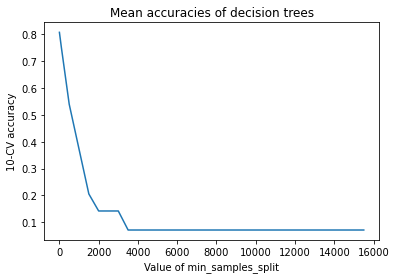

In [7]:
mss = [2, 100]
accuracies = []
for i in range(500, 15501, 500):
    mss.append(i)
for val in mss:
    clf = DecisionTreeClassifier(min_samples_split=val, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_1.png")
plt.show()

Based on this first study, we can see that the value of min_sample_split that provides the highest accuracy is lower than 2000.
Let us do a more precise study.

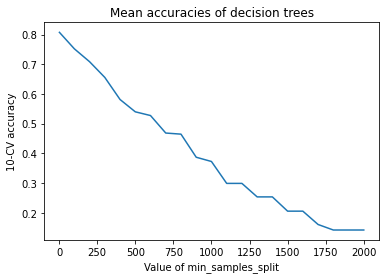

In [8]:
mss = [2, 100]
accuracies = []
for i in range(200, 2001, 100):
    mss.append(i)
for val in mss:
    clf = DecisionTreeClassifier(min_samples_split=val, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_2.png")
plt.show()

Based on this second study, we can see that the value of min sample_split that provides the highest accuracy is lower than 200. Let us do a more precise study.

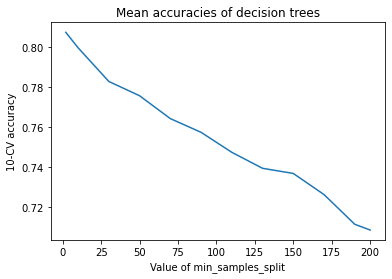

In [9]:
mss = [2]
accuracies = []
for i in range(10, 200, 20):
    mss.append(i)
mss.append(200)
for val in mss:
    clf = DecisionTreeClassifier(min_samples_split=val, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_3.png")
plt.show()

Let us do another study for values of min_sample_split between 2 and 25

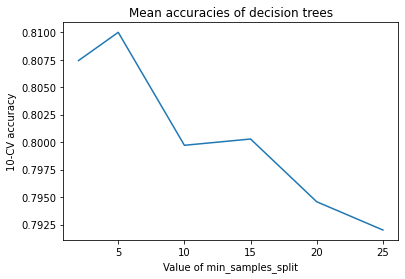

In [10]:
mss = [2, 5, 10, 15, 20, 25]
accuracies = []
for val in mss:
    clf = DecisionTreeClassifier(min_samples_split=val, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_4.png")
plt.show()

Let us study what happens precisely in the range [2,5]

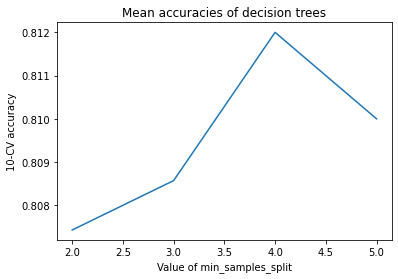

In [11]:
mss = []
accuracies = []
for i in range(2,6,1):
    mss.append(i)
    clf = DecisionTreeClassifier(min_samples_split=i, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_5.png")
plt.show()

Using a small value for min_samples_split seems to provide the best accuracy using a 10-CV.
But, we migh overfit on unseen data. Let us study the overfitting.

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.8, random_state=0)

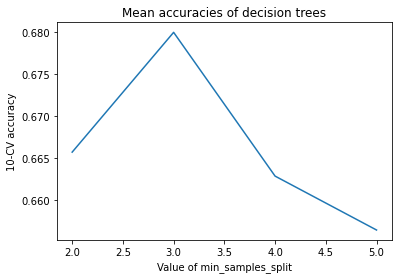

In [13]:
mss = []
accuracies = []
for i in range(2,6,1):
    mss.append(i)
    clf = DecisionTreeClassifier(min_samples_split=i, random_state=0).fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    accuracies.append(score)
plt.plot(mss, accuracies)
plt.title("Mean accuracies of decision trees")
plt.xlabel("Value of min_samples_split")
plt.ylabel("10-CV accuracy")
plt.savefig("dt_basic_accuracies_6.png")
plt.show()

Let us use minimal cost-complexity prunning.
Based on https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, random_state=42)

In [29]:
tree = DecisionTreeClassifier(random_state=42)
path = tree.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
ccp_alphas = np.sort(ccp_alphas)
print(ccp_alphas)
print(len(ccp_alphas))

[0.00000000e+00 1.58730159e-05 2.04081633e-05 3.18527411e-04
 3.26530612e-04 3.77180575e-04 3.80952381e-04 3.80952381e-04
 3.80952381e-04 3.80952381e-04 3.80952381e-04 3.80952381e-04
 3.80952381e-04 3.80952381e-04 3.80952381e-04 3.80952381e-04
 3.80952381e-04 3.80952381e-04 3.80952381e-04 3.80952381e-04
 5.07936508e-04 5.07936508e-04 5.07936508e-04 5.07936508e-04
 5.07936508e-04 5.07936508e-04 5.07936508e-04 5.07936508e-04
 5.07936508e-04 5.07936508e-04 5.07936508e-04 5.33333333e-04
 5.71428571e-04 5.71428571e-04 5.71428571e-04 5.71428571e-04
 5.71428571e-04 5.85034014e-04 6.09523810e-04 6.09523810e-04
 6.09523810e-04 6.09523810e-04 6.34920635e-04 6.66666667e-04
 6.66666667e-04 6.77248677e-04 6.85714286e-04 6.85714286e-04
 6.85714286e-04 6.98412698e-04 7.03296703e-04 7.03296703e-04
 7.07482993e-04 7.11111111e-04 7.11111111e-04 7.11111111e-04
 7.11111111e-04 7.11111111e-04 7.23809524e-04 7.25347260e-04
 7.30158730e-04 7.31428571e-04 7.42857143e-04 7.48538012e-04
 7.49811036e-04 7.550407

We cannot try all the values. It requires too much computation. We will try a fifth of it.

In [31]:
trees = []
ccp = []
lenCPP = len(ccp_alphas)
i=0
while i < lenCPP:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i]).fit(xtrain, ytrain)
    trees.append(tree)
    ccp.append(ccp_alphas[i])
    i+=5

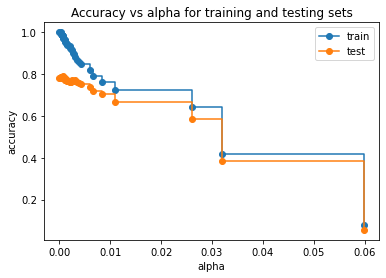

In [32]:
train_scores = [tree.score(xtrain, ytrain) for tree in trees]
test_scores = [tree.score(xtest, ytest) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.savefig("dt_pruning_study.png")
plt.show()

Let us find the value of alpha that provides the highest accuracy on the test

In [33]:
maxTest = max(test_scores)
index = test_scores.index(maxTest)
optimalAlpha = ccp[index]
print(optimalAlpha)

0.0006772486772486773


Zooming on the graph

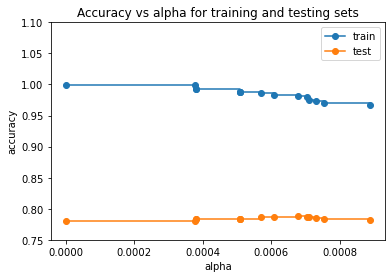

In [35]:
train_scores = train_scores[:20]
test_scores = test_scores[:20]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp[:15], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp[:15], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.ylim((0.75, 1.1))
plt.savefig("dt_pruning_study_zoomed.png")
plt.show()

Estimated decision tree with alpha=0.0006772486772486773 using 10-fold cross validation.

In [36]:
clfDT2Pruned = DecisionTreeClassifier(min_samples_split=2, random_state=0, ccp_alpha=optimalAlpha)
scoresDT2Pruned = cross_val_score(clfDT2Pruned, X_train, y_train, cv=10, n_jobs=-1)
print(scoresDT2Pruned.mean())

0.8025714285714285
